1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
Feature map shape: (1, 14, 14, 512)


C:\Users\Ayush Maurya\AppData\Local\Temp\ipykernel_66476\835201770.py:28: RuntimeWarning: invalid value encountered in divide
  feature_map /= feature_map.max()  # Normalize to [0,1]


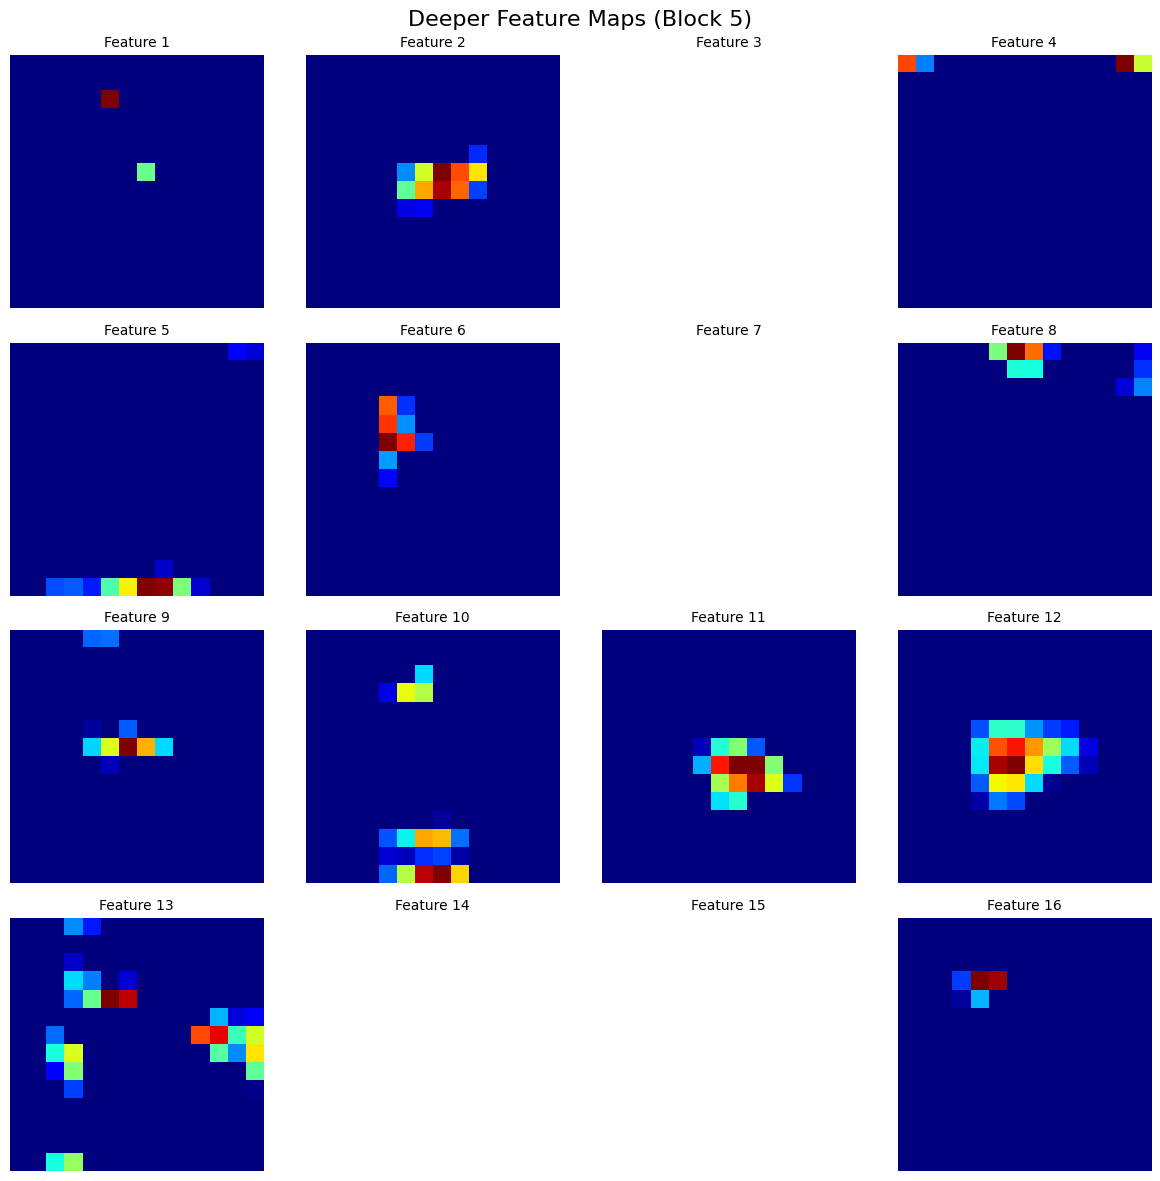

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load image and preprocess
image_path = r"E:\ML and AI\deep learning\neural network\cnn\cat\dhoni\manchester-england-ms-dhoni-of-india-prepares-to-bat-during-a-net-session-at-old-trafford-on.webp" # Change this to your image
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Load VGG16 model (Change to ResNet/AlexNet if needed)
model = VGG16(weights='imagenet')

# Select deeper convolutional layer
layer_index = 17  # Change this index based on layer list
feature_extractor = Model(inputs=model.input, outputs=model.layers[layer_index].output)

# Get feature maps
features = feature_extractor.predict(image)
print("Feature map shape:", features.shape)  # Expected (1, H, W, C)

# Normalize feature maps for better visualization
def normalize_feature_map(feature_map):
    feature_map -= feature_map.min()  # Shift min to 0
    feature_map /= feature_map.max()  # Normalize to [0,1]
    return feature_map

# Plot deeper feature maps
if len(features.shape) == 4:
    num_filters = features.shape[-1]  # Number of feature maps
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Show 16 key features
    fig.suptitle("Deeper Feature Maps (Block 5)", fontsize=16)

    for i in range(16):  # Show only 16 deeper feature maps
        ax = axes[i // 4, i % 4]
        feature_map = features[0, :, :, i]  # Extract feature map
        feature_map = normalize_feature_map(feature_map)  # Normalize

        ax.imshow(feature_map, cmap="jet")  # Use 'jet' colormap for clarity
        ax.axis("off")
        ax.set_title(f"Feature {i+1}", fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("Feature map has incorrect dimensions:", features.shape)
